In [1]:
import sys
import os

if '..//..//' not in sys.path:
    sys.path.append('..//../')

from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt
import json

In [2]:
savepath = "C:/Users/lnr19/OneDrive - Imperial College London/thesis/for _thesis/modelling/efield_data/"

savepath_full = os.path.join(savepath, "dOPM_sio2_customrays")
if not os.path.exists(savepath_full):
    os.makedirs(savepath_full)
save_filename = os.path.join(savepath_full,'collection_efficiency.txt')
save_details = os.path.join(savepath_full,'sim_details.txt')


# setup
# O1
M_O1 = 60
NA_O1 = 1.2
# NA_O1 = 1.27
n_O1 =1.33
f_TL1 = 0.2  # Nikon
f_O1 = f_TL1/M_O1

# O2
M_O2 = 50
NA_O2 = 0.95
f_TL2 = 0.162406015 #0.15#0.180  # Olympus
f_O2 = 0.180/M_O2

perfect_mirror = False
retardance = True  # false to ignore retardance effect
film_mat = "SiO2"
# film_mat = "perfect mirror"
film_ri = "../../refractive_index_data/"+film_mat+".txt"
film_thickness = 161e-9 # 161e-9 # 131e-9

opm_angle = 35


In [4]:
dipole_count = 7500

options = {
    'ray_count': 15000,
    'draw_rays': False,
    'max_rays_stored': 10000,
    'ray_dist': 'fibonacci',
    'custom_rays': True,
    'keep_escaped':True
}

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True,
    'max_r_in': 0,
    'scale_range': None# [0,0.3]
}

#opm_angle = 35*np.pi/180

O1 = optical_elements.SineLens(NA=NA_O1, focal_length=f_O1, n=n_O1)
TL1 = optical_elements.SineLens(NA=0.1, focal_length=f_TL1, n=1)
O2 = optical_elements.SineLens(NA=NA_O2, focal_length=f_O2, n=1)
O2_1 = optical_elements.SineLens(NA=1, focal_length=f_O2, n=1)

TL2 = optical_elements.SineLens(NA=0.1, focal_length=f_TL2, n=1)

diag = optical_elements.DiagonalMatrix(-1)

QWP = optical_elements.WavePlate(np.pi/4, np.pi/2)
QWP2 = optical_elements.WavePlate(-np.pi/4, np.pi/2)

LP = optical_elements.LinearPolariser(np.pi/2)
LP2 = optical_elements.LinearPolariser(0)


Ag_mirror = lambda opm_angle: optical_elements.FlatMirror(opm_angle*np.pi/360, film_thickness,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output",
                                            n_metal_file = "../../refractive_index_data/Ag.txt",\
                                            n_film_file = film_ri, perfect_mirror=perfect_mirror,\
                                            retardance=retardance)

perf_mirror = lambda opm_angle: optical_elements.FlatMirror(opm_angle*np.pi/360, film_thickness,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output",
                                            n_metal_file = "../../refractive_index_data/Ag.txt",\
                                            n_film_file = film_ri, perfect_mirror=True)

single_surface_mirror = lambda opm_angle: optical_elements.FlatMirror(opm_angle*np.pi/360,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output",
                                            n_metal_file = "../../refractive_index_data/Ag.txt",\
                                            n_film_file = None, single_surface=True, plot_debug=True)


elements_fun = lambda opm_angle: [O1, TL1, TL2, LP, QWP, O2, single_surface_mirror(opm_angle), O2, QWP, LP2]

ray_thetas = np.pi/180*np.array([45,45,-45,-45,45,45,-45,-45])
ray_phis = np.pi/180*np.array([0,0,0,0,90,90,90,90])
ray_Ex = np.array([0,2**-0.5,0,2**-0.5,0,-1,0,-1])
ray_Ey = np.array([1,0,1,0,2**-0.5,0,2**-0.5,0])
ray_Ez = np.array([0,-2**-0.5,0,2**-0.5,-2**-0.5,0,2**-0.5,0])


Defining custom rays, remember to add custom_rays=True to options when running OpticalSystem!
Ex [ 0.          0.70710678  0.          0.70710678  0.         -1.
  0.         -1.        ]
Ey [1.         0.         1.         0.         0.70710678 0.
 0.70710678 0.        ]
Ez [ 0.         -0.70710678  0.          0.70710678 -0.70710678  0.
  0.70710678  0.        ]
dot product [[[ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.32978028e-17]
  [ 0.00000000e+00]
  [ 4.32978028e-17]]]
(1, 1, 1, 1)
initialisation time in system 0.000000s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001FEFF4CBB50>
CURVED REFRACTION
max rho curved 0.0023570226039551587
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001FEFF4CBBB0>
max rho flat 0.003134840063260361
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001FEFF4CBC70>
CURVED REFRACTION
max rho curved 0.0025455844116823146
ELEMENT: <opmsi

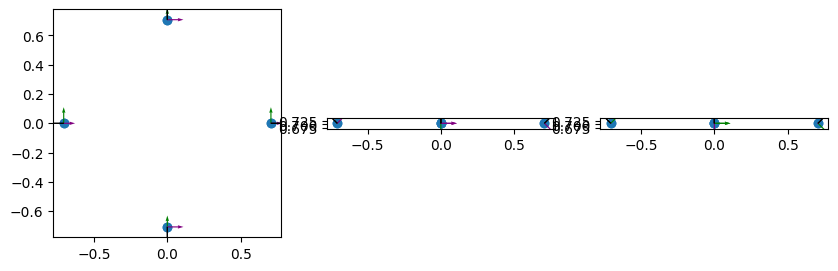

0.30543261909900765
(8, 3)
()
()
(8, 3)
(8, 3)
()
()
(8, 3)
USING SINGLE SURFACE MIRROR
n_complex (0.1299+2.9738j)
----------------------Electric field after reflection------------------
False
E_vec.shape[1] 8


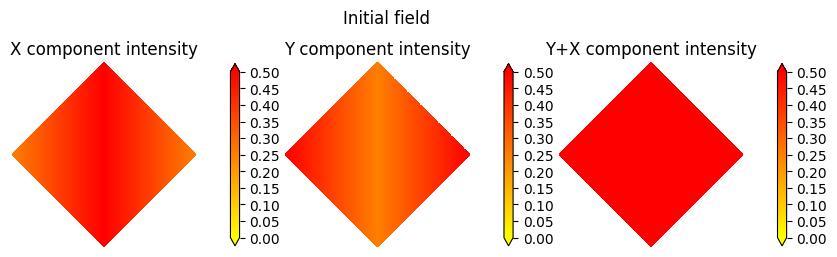

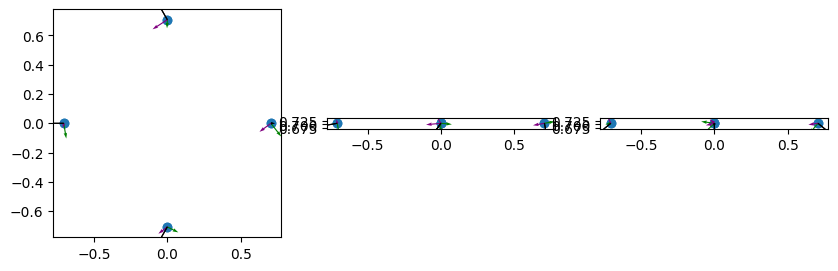

C:\Users\lnr19\Anaconda3\envs\polarisation_model\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


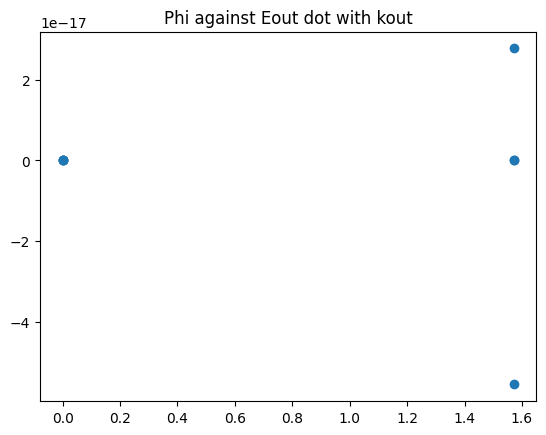

ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001FEFF4CBC10>
CURVED REFRACTION
max rho curved 0.003545307910699242
2 escaped from NA mask
ELEMENT: <opmsim.optical_elements.WavePlate object at 0x000001FEFF4CBB80>
ELEMENT: <opmsim.optical_elements.LinearPolariser object at 0x000001FEFF4B6850>
[1 1 1 1 1 1 1 1]
Saved checkpoint with 10000 rays
Limiting radius for detector: 0.004
Energy ratio (efficiency): 0.429935318967547
Total energy per dipole per ray: 3.439482551740376
Energy from Ix 3.439482551740376
Energy from Iy 1.3555363469437232e-32
X/Y energy ratio = 2.537359149015257e+32
Half sphere energy 1
Initial energy 8.0
half sphere energy NA 1
maxr 0.004
0 escaped out of 8
[1 1 1 1 1 1 1 1]
Saved checkpoint with 10000 rays
[1 1 1 1 1 1 1 1]
2 escaped out of 8
time in trace_rays 2.586345s


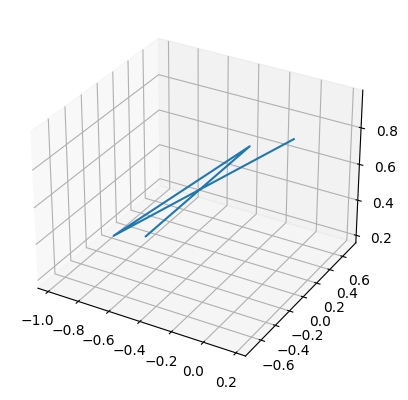

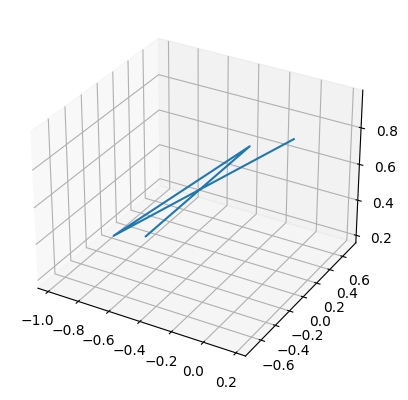

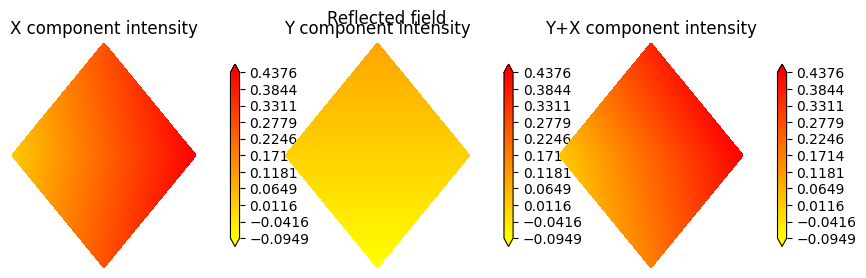

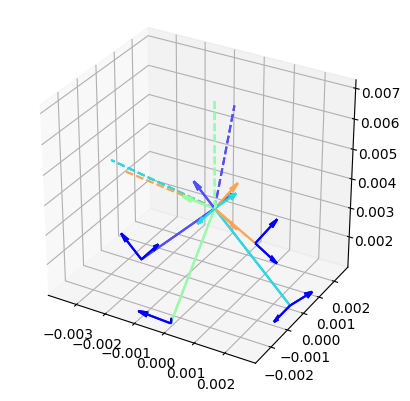

In [5]:
with open(save_details, 'w') as f:
    f.write("focal lengths:\n")
    f.write("O1,TL1,TL2,O2,O2\n")
    lenses = [el for el in elements_fun(0) if isinstance(el, optical_elements.SineLens)]
    fs=[el.focal_length for el in lenses]
    f.write(",".join(str(item) for item in fs))
    f.write("\noptions:\n")
    f.write(json.dumps(options))
    
opm_angle = 35
elements = elements_fun(opm_angle)

source = dipole_source.DipoleSource(lda_em=506.12e-9)
source.define_custom_rays(ray_phis, ray_thetas, ray_Ex, ray_Ey, ray_Ez)

system = OpticalSystem("Dual view system (%d degrees) custom rays tumbling" % opm_angle, elements, source, options)
system.trace()



In [6]:
rays = system.detector.rays

I_out = rays.I_vec
print("I_out =", I_out)
print("|I_out| =", np.sum(I_out, axis=2))
print("rays.theta", rays.theta)
print("rays.phi", rays.phi)
print(rays.escaped)

I_out = [[[[9.42437878e-01]
   [0.00000000e+00]
   [1.95806539e-30]]

  [[2.39606573e-33]
   [0.00000000e+00]
   [5.38662823e-36]]

  [[7.26334762e-01]
   [0.00000000e+00]
   [1.12673509e-32]]

  [[1.43377623e-33]
   [0.00000000e+00]
   [5.38662823e-36]]

  [[8.85354956e-01]
   [7.12465730e-33]
   [4.96189600e-32]]

  [[1.65977470e-33]
   [1.85929662e-65]
   [1.87469973e-33]]

  [[8.85354956e-01]
   [6.43070617e-33]
   [4.59013676e-32]]

  [[1.65977470e-33]
   [5.26255567e-66]
   [1.87469973e-33]]]]
|I_out| = [[[9.42437878e-01]
  [2.40145236e-33]
  [7.26334762e-01]
  [1.43916286e-33]
  [8.85354956e-01]
  [3.53447442e-33]
  [8.85354956e-01]
  [3.53447442e-33]]]
rays.theta [0. 0. 0. 0. 0. 0. 0. 0.]
rays.phi [ 0.          0.          3.14159265  3.14159265  2.0915601   2.0915601
 -2.0915601  -2.0915601 ]
[False False  True  True False False False False]
